In [20]:
import numpy as np
import pandas as pd

In [21]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation

In [22]:
data = pd.read_csv('/content/sample_data/Sales.csv')

In [23]:
x = data['GrLivArea']
y = data['SalePrice']

In [24]:
x = (x-x.mean())/x.std()
x = np.c_[np.ones(x.shape[0]), x]

### GRADIENT DESCENT

In [25]:
alpha = 0.01 #step size
iterations = 2000 #no. of iterations
m = y.size #no. of data points
np.random.seed(123) #set the seed
theta = np.random.rand(2) #pick some radom values to start with

In [26]:
def gradient_descent (x, y, theta, iterations, alpha):
  past_costs = []
  past_thetas = [theta]
  for i in range(iterations):
    prediction = np.dot(x, theta)
    error = prediction - y
    cost = 1/(2*m)*np.dot(error.T, error)
    past_costs.append(cost)
    theta = theta - (alpha*(1/m)*np.dot(x.T, error))
    past_thetas.append(theta)

  return past_thetas, past_costs

In [27]:
past_thetas, past_costs = gradient_descent(x, y, theta, iterations, alpha)
theta = past_thetas[-1]

In [28]:
print("Gadient Descent: {:.2f}, {:.2f}".format(theta[0], theta[1]))

Gadient Descent: 180921.20, 56294.90


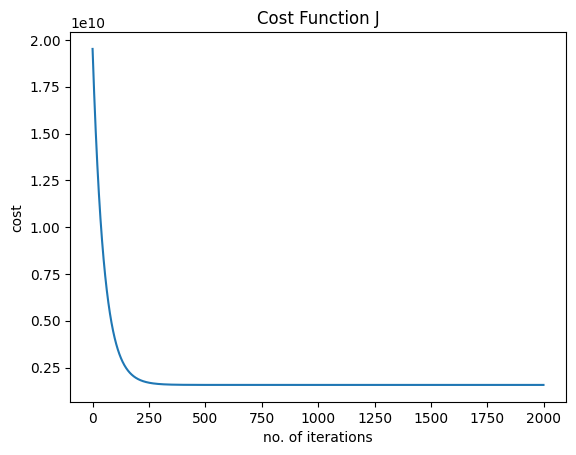

In [29]:
plt.title('Cost Function J')
plt.xlabel('no. of iterations')
plt.ylabel('cost')
plt.plot(past_costs)
plt.show()

###ANIMATION

In [30]:
fig = plt.figure()
ax = plt.axes()
plt.title('Sale Price vs Living Area')
plt.xlabel('Living Area in square feet (normalised)')
plt.ylabel('Sale Price ($)')
plt.scatter(x[:,1], y, color='red')
line, = ax.plot([], [], lw=2)
annotation = ax.text(-1, 700000, '')
annotation.set_animated(True)
plt.close()

In [31]:
def init():
  line.set_data([], [])
  annotation.set_text('')
  return line, annotation

In [32]:
def animate(i):
  x = np.linspace(-5, 20, 1000)
  y = past_thetas[i][1]*x + past_thetas[i][0]
  line.set_data(x, y)
  annotation.set_text('Cost = %.2f e10' % (past_costs[i]/10000000000))
  return line, annotation

anim = animation.FuncAnimation(fig, animate, init_func=init,frames=300, interval=0, blit=True)

anim.save('animation.gif', writer='imagemagick', fps = 30)

In [36]:
import io
import base64
from IPython.display import HTML

filename = 'animation.gif'

video = io.open(filename, 'r+b').read()
encoded = base64.b64encode(video)
HTML(data=''''''.format(encoded.decode('ascii')))